<a href="https://colab.research.google.com/github/YAMSANISAHITHI/2216125_AIML_BootCamp/blob/main/Assignment4(dataset2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#step1
dataset="/content/drive/MyDrive/EmissionsData.csv"
import pandas as pd
df=pd.read_csv(dataset)#dataframe-2D

In [2]:
df.head()

,SNO,ENGINESIZE,CO2EMISSIONS
0,0,2.0,196.0
1,1,2.4,221.0
2,2,1.5,136.0
3,3,3.5,255.0
4,4,3.5,244.0


In [3]:
df.tail()

,SNO,ENGINESIZE,CO2EMISSIONS
9,9,2.4,267.0
10,10,3.5,NaN
11,11,2.5,NaN
12,12,NaN,269.0
13,13,2.6,270.0


In [4]:
df.shape

(14, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SNO           14 non-null     int64  
 1   ENGINESIZE    13 non-null     float64
 2   CO2EMISSIONS  12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 464.0 bytes


In [7]:
#step2
#Visualize the dataset
import matplotlib.pyplot as plt


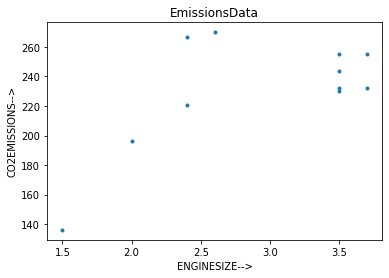

In [9]:
plt.scatter(df.,df.CO2EMISSIONS,marker='.')
plt.xlabel("ENGINESIZE-->")
plt.ylabel("CO2EMISSIONS-->")
plt.title("EmissionsData")
plt.show()

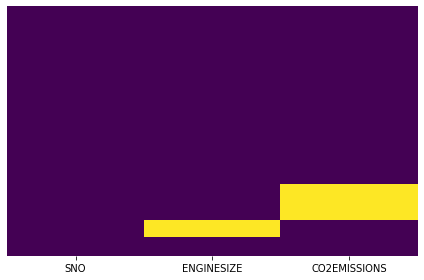

In [10]:
#seaborn
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)

In [54]:
#step 3
#Preprocessing the Dataset
#method drop the rows with NaN Values
#df = df.dropna()

import math
median_ENGINESIZE = math.floor(df.ENGINESIZE.median())
median_ENGINESIZE

3

In [58]:
df.ENGINESIZE = df.ENGINESIZE.fillna(median_ENGINESIZE)

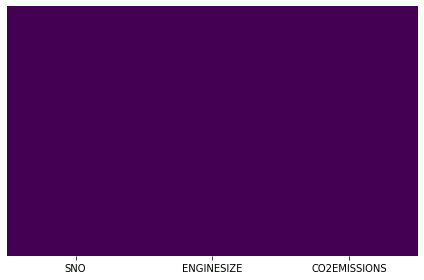

In [17]:
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)

In [43]:
#step4:Preparing the Data for feeding the model
#X-->Independent variable-Feature
#Y-->Dependent variable-Label

#step4 preparing the data
x=df.iloc[0:,-2:-1].values
y=df.iloc[:,-1:].values


In [44]:
x

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [3.5],
       [2.5],
       [3. ],
       [2.6]])

In [45]:
y

array([[196.],
       [221.],
       [136.],
       [255.],
       [244.],
       [230.],
       [232.],
       [232.],
       [255.],
       [267.],
       [233.],
       [233.],
       [269.],
       [270.]])

In [47]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [48]:
x_train

array([[2.5],
       [1.5],
       [2.6],
       [2.4],
       [2.4],
       [3.7],
       [3.5],
       [3.5],
       [2. ],
       [3.5],
       [3. ]])

In [50]:
x_test

array([[3.7],
       [3.5],
       [3.5]])

In [51]:
y_train

array([[233.],
       [136.],
       [270.],
       [267.],
       [221.],
       [232.],
       [233.],
       [255.],
       [196.],
       [230.],
       [269.]])

In [27]:
y_test

array([[255.],
       [232.],
       [244.]])

In [37]:
#training model-fitting the alogirthm
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
#Predict 
Y_pred=model.predict(x_test)
Y_pred

array([[259.68622904],
       [253.45754549],
       [253.45754549]])

In [40]:
y_test

array([[255.],
       [232.],
       [244.]])

In [41]:
print("Predicted value for training data:",model.score(x_train,y_train))
print("Training Accuracy:",model.score(x_train,y_train)*100)

Predicted value for training data: 0.325265263742891
Training Accuracy: 32.5265263742891


In [42]:
print("Predicted value for testing data:",model.score(x_test,y_test))
print("Training Accuracy:",model.score(x_test,y_test)*100)

Predicted value for testing data: -1.1605749404872192
Training Accuracy: -116.05749404872192


In [35]:
accurancy=model.score(x,y)*100
print(accurancy)

31.631486410905186


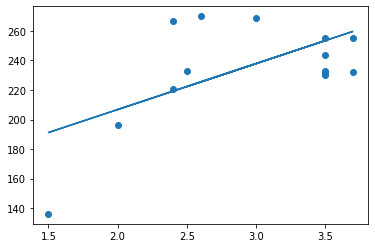

In [36]:
#visualizing results
#plotting the linear regression
line =model.coef_*x+model.intercept_
#y=mx+c
#ploting for data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

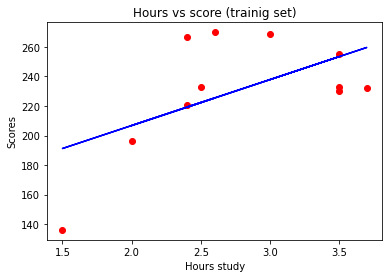

In [60]:
#train set results
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('Hours vs score (trainig set)')
plt.xlabel('Hours study')
plt.ylabel('Scores')
plt.show()


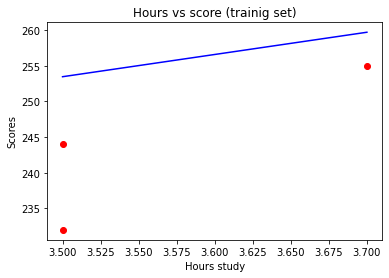

In [61]:
#train set results
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,model.predict(x_test),color='blue')
plt.title('Hours vs score (trainig set)')
plt.xlabel('Hours study')
plt.ylabel('Scores')
plt.show()

